In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_context('poster')
sns.set_style("whitegrid", {'axes.grid': False})
import h5py
import tensorflow as tf
from scipy import (io, signal)
from keras import backend as K

from os.path import join as pjoin
gpu_opts = tf.ConfigProto(gpu_options=tf.GPUOptions(per_process_gpu_memory_fraction=0.4))
K.set_session(tf.Session(config=gpu_opts))
#K.set_image_data_format('channels_last')

Using TensorFlow backend.


In [2]:
# Looks for files in current directory
folder_path = './data/'

# (User) Loads all the data, this file needs to be in the path defined by folder_path
data = h5py.File(os.path.join(folder_path, 'cleaned_data.mat'))
f = h5py.File(os.path.join(folder_path, 'cleaned_data.mat'), 'r')
for name, data in f.items():
    print(name)  # Name

# (User) Loads all the data, this file needs to be in the path defined by folder_path
voltage_data = io.matlab.loadmat(pjoin(folder_path, 'voltage_vector.mat'))
voltage = voltage_data['BE_wave'].squeeze()

LPF_cutOff
bandFilt
comb
filt_AI_mat
freqUnit
phase_deg
tol


In [3]:
voltage_resample = signal.resample(voltage,40*128*4)

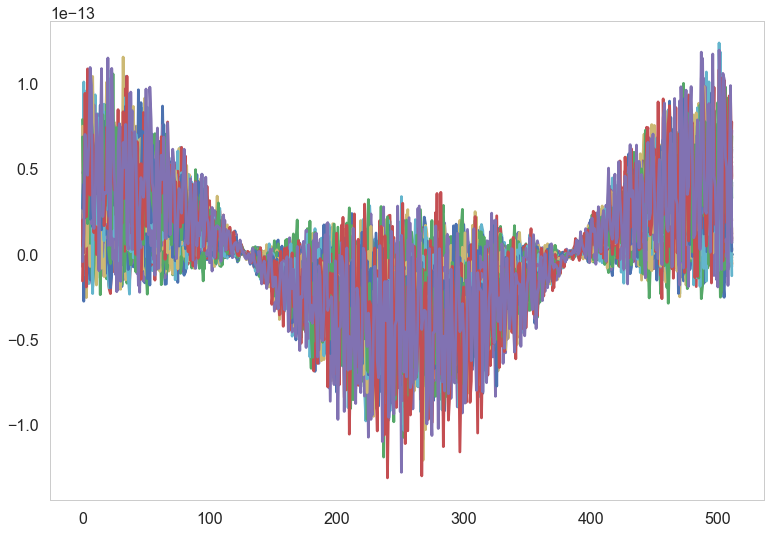

In [4]:
for i in range(40):
    plt.plot(voltage_resample[0:128*4]-voltage_resample[128*4*i:128*4*i+128*4])

In [5]:
loop_data = f['filt_AI_mat'][()]

In [14]:
X = np.rollaxis(loop_data.reshape(loop_data.shape[0], -1), 1)

65536

In [16]:
%%time
X_reshape = np.zeros((X.shape[0],40*128*4))

for i in range(X.shape[0]):
    X_reshape[i] = signal.resample(X[i],40*128*4)

CPU times: user 1min 27s, sys: 53.5 s, total: 2min 21s
Wall time: 3min 57s


In [17]:
X_reshape = X_reshape.reshape((-1, 40*128*4))


In [19]:
%%time
X_resample -= np.mean(X_resample)
X_resample /= np.std(X_resample)

CPU times: user 23 s, sys: 1min 22s, total: 1min 45s
Wall time: 3min 44s


In [21]:
X_reshape.shape

(65536, 20480)

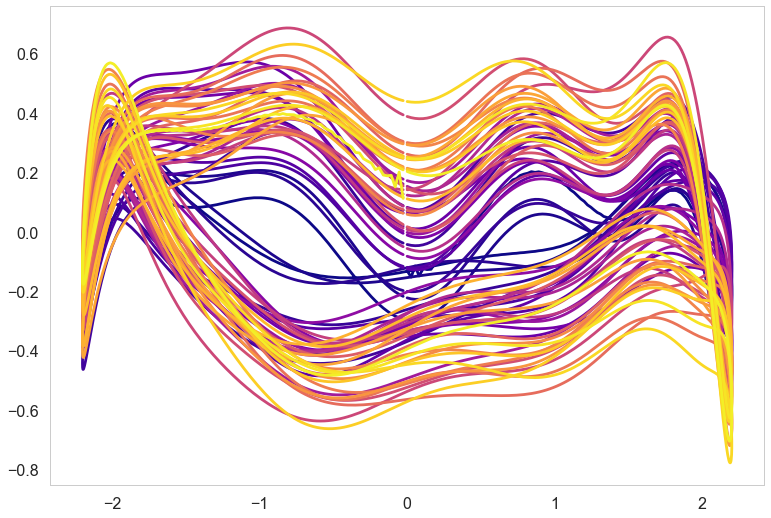

In [48]:
import matplotlib.colors as colors
import matplotlib.cm as cmx


plasma = cm = plt.get_cmap('plasma') 
cNorm  = colors.Normalize(vmin=0, vmax=40)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=plasma) 

for i in range(40):    
    plt.plot(voltage_resample[0:512],X_reshape[400,512*i:512*(i+1)],c=scalarMap.to_rgba(i))